# ML Model

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [30]:
#importing the dataset
data = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [31]:
# seperating the target collumn and attribute columns an dropping the not necessary ones.
y = data.diagnosis
drp = ['id','diagnosis', 'Unnamed: 32']
x= data.drop(drp,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
drp = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se',
       'perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
       'compactness_se','concave points_se','texture_worst','area_worst']
# making a new x_1 as do not want to make chnages in original dataset just incase.
x_1 = x.drop(drp,axis = 1 )       
print(x_1.shape)
x_1.head()

(569, 16)


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#splitting the dataset into x and cross validation
X, X_cv, y, y_cv = train_test_split(x_1, y, test_size=0.2, random_state=42, stratify = y)

In [35]:
# Splittig the dataset into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
pred_valid = lr.predict_proba(X_cv)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_cv, pred_valid[:,1])

0.9861111111111112

In [39]:
pred_test = lr.predict_proba(X_test)
roc_auc_score(y_test, pred_test[:,1])

0.9901960784313726

## Observation 
* As auc roc score in between 0.5 and 1 where 0.5 being a bad model and 1 being very good our model scores 0.99 which is awaesome
* There does not seem to be any over fitting as the validationi score and test score are pretty close

In [23]:
# Lets see what is the feature importance of each feature
factors = X_test.columns
print(factors)

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Feature: 0, Score: 0.28981
Feature: 1, Score: 0.00664
Feature: 2, Score: 0.01140
Feature: 3, Score: 0.84205
Feature: 4, Score: -0.10696
Feature: 5, Score: -0.17769
Feature: 6, Score: -1.08382
Feature: 7, Score: 0.07568
Feature: 8, Score: -0.02011
Feature: 9, Score: -0.44291
Feature: 10, Score: -0.06834
Feature: 11, Score: -0.05020
Feature: 12, Score: 0.37816
Feature: 13, Score: 2.86180
Feature: 14, Score: 1.14601
Feature: 15, Score: 0.05571


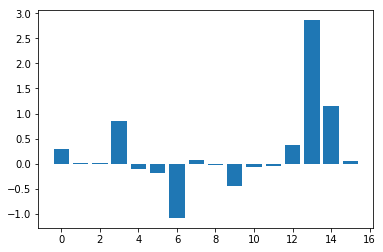

In [26]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Obesrvation 
* According to the graph factor 14th is the best i.e. concavity_worst
* According to the graph factor 7th is the worst i.e. area_se.